## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Fast Fourier Transform (FFT)

## Practice 1: FFT for sine function

### 1-1. Define freqeuncies (f) and angular frequencies (w) to generate a sine function

In [2]:
# Frequencies (Hz)
f1 = 2
f2 = 3
f3 = 5
f4 = 21
f5 = 30

# Angular frequencies = 2pi*f (rad/s)
w1 = 2*np.pi*f1
w2 = 2*np.pi*f2
w3 = 2*np.pi*f3
w4 = 2*np.pi*f4
w5 = 2*np.pi*f5

In [3]:
print("f1 =",f1, "/ f2 =",f2, "/ f3 =",f3, "/ f4 =",f4, "/ f5 =",f5 )
print("w1 =",w1, "/ w2 =",w2, "/ w3 =",w3, "/ w4 =",w4, "/ w5 =",w5 )

f1 = 2 / f2 = 3 / f3 = 5 / f4 = 21 / f5 = 30
w1 = 12.566370614359172 / w2 = 18.84955592153876 / w3 = 31.41592653589793 / w4 = 131.94689145077132 / w5 = 188.49555921538757


### 1-2. Generate a sine function (discrete)

In [9]:
t = np.arange(0,5,0.01)   # Sampling freq : 100 Hz, sampling time : 5 seconds
# t = np.arange(0,5,0.001)  # Sampling freq : 1000 Hz, sampling time : 5 seconds
x = 5*np.sin(w1*t) + 4*np.sin(w2*t) + 3*np.sin(w3*t) + 2*np.sin(w4*t) + 1*np.sin(w5*t)

t.shape

(500,)

### 1-3. Check the sine function graph in time domain

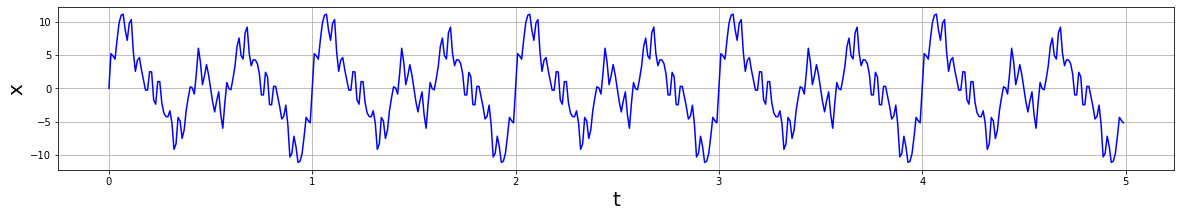

In [24]:
plt.figure(figsize=(20,3))
plt.plot(t, x, 'b-')
plt.xlabel('t',fontsize=20)
plt.ylabel('x',fontsize=20)
# plt.xlim(1,2)
plt.grid()
plt.show()

### 1-4. Implement the FFT

#### 1-4-1. Calculate sampling frequency (Fs)
- Fs = Number of sample / sampling time

In [25]:
Fs = int(len(t)/t[-1]) # sampling freq
Fs

100

#### 1-4-2. 

In [16]:
NFFT      =  len(x)                        # 데이터 크기

k         =  np.arange(NFFT)               
f0        =  k * Fs / NFFT                 # Double side 주파수 축
f0        =  f0[range(math.trunc(NFFT/2))] # Single side 주파수 축, 변환 주파수 영역: 0 ~ sampling freq/2 (Nyquist Theorem)

Y         =  np.fft.fft(x)/NFFT            # FFT 적용: 복소수 형태
Y         =  Y[range(math.trunc(NFFT/2))]
amp       =  2 * abs(Y)                    # FFT 결과: 절댓값
phase     =  np.angle(Y) * 180/np.pi       # FFT 결과: 위상각

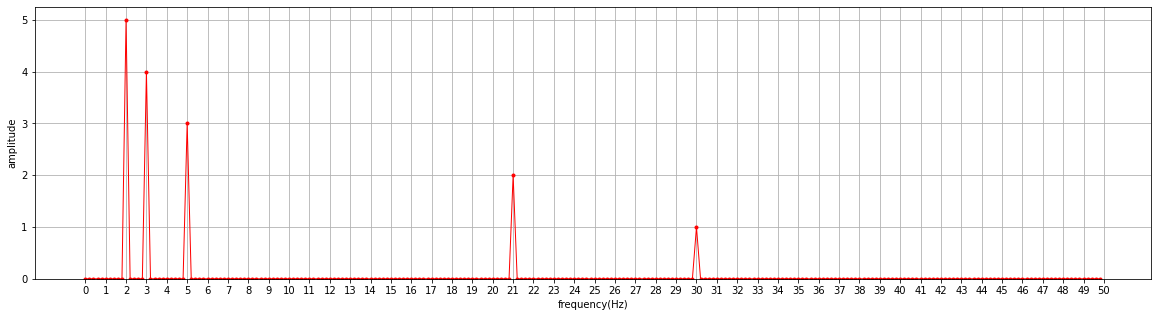

In [18]:
plt.figure(figsize=(20,5))
plt.plot(f0, amp, 'r.-', lw=1)
# plt.xlim(0, Fs/2)
plt.ylim(0)
plt.xticks(np.arange(0,(Fs/2)+1))
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude')
plt.grid()

In [20]:
from numpy.fft import fft, ifft

In [26]:
X = fft(x)
N = len(X)
n = np.arange(N)
T = N/Fs
f0 = n/T

<ipython-input-29-4c10f0b4276a>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(f0, np.abs(X), 'b', markerfmt=" ", basefmt="-b")


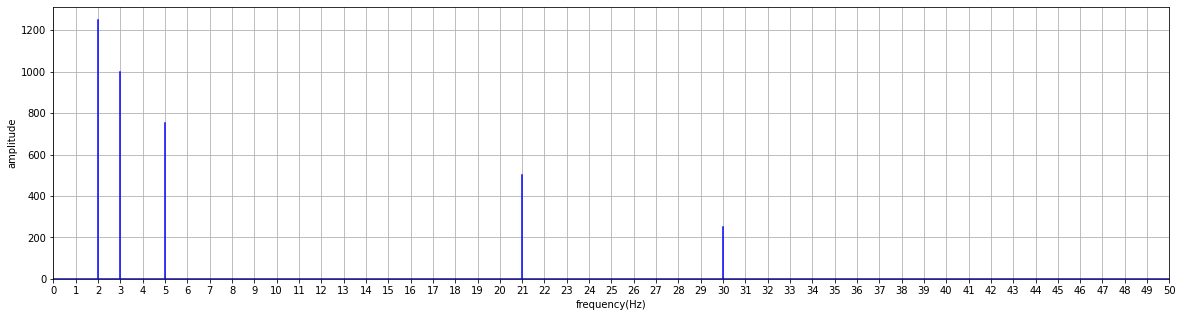

In [29]:
plt.figure(figsize=(20,5))
# plt.plot(f0, X, 'r.-', lw=1)
plt.stem(f0, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlim(0, Fs/2)
plt.ylim(0)
plt.xticks(np.arange(0,(Fs/2)+1))
plt.xlabel('frequency(Hz)')
plt.ylabel('amplitude')
plt.grid()